In [2]:
# Importing dependencies as well as the Kiva dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Kiva dataset - Kaggle format:
kiva_loans = pd.read_csv('data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
kiva_mpi_region_locations = pd.read_csv('data-science-for-good-kiva-crowdfunding//kiva_mpi_region_locations.csv')
loan_theme_ids = pd.read_csv('data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv')
loan_themes_by_region = pd.read_csv('data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')
data = pd.DataFrame(loan_themes_by_region)
data.head(10)



,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
5,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,62225,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
6,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,1300,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
7,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000weyk,General,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,237175,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
8,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,3050,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
9,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,31425,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0


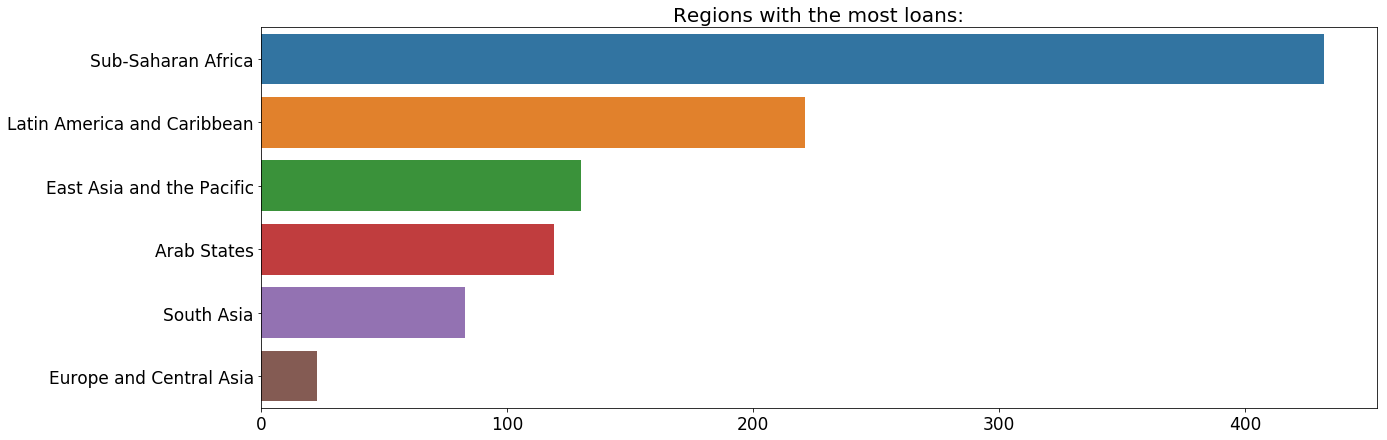

In [17]:
# Regions with the most loans
kiva_loan_regions = pd.DataFrame(kiva_mpi_region_locations['world_region'].value_counts())
kiva_loan_regions.reset_index(inplace=True)
kiva_loan_regions.columns = ['world_region', 'loan_amount']

kiva_loan_regions=pd.DataFrame(kiva_loan_regions)
kiva_loan_regions
plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_loan_regions['loan_amount'], y=kiva_loan_regions['world_region'])
barplot.set(xlabel='', ylabel='')
plt.title('Regions with the most loans:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

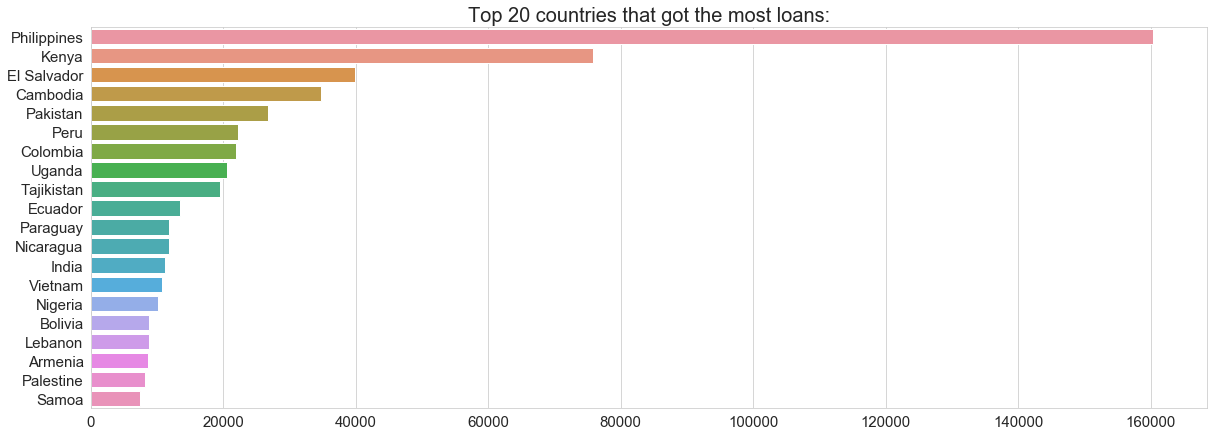

In [4]:
# Countries with  most loans
kiva_loans_countries = pd.DataFrame(kiva_loans['country'].value_counts(sort=['loan_amount']))
kiva_loans_countries.reset_index(inplace=True)
kiva_loans_countries.columns = ['country', 'loan_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_loans_countries['loan_amount'][:20], y=kiva_loans_countries['country'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 countries that got the most loans:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

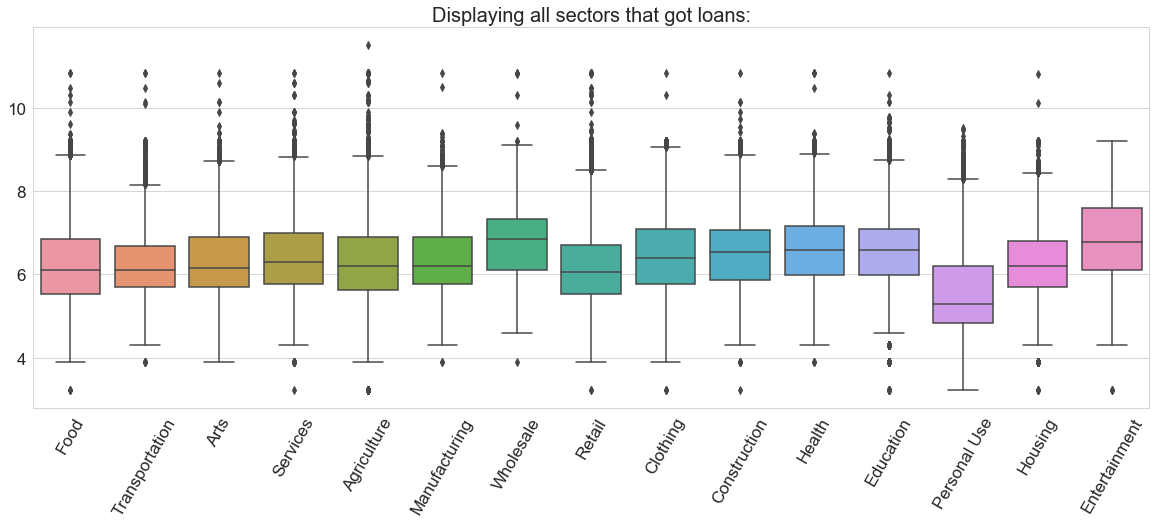

In [3]:
kiva_loans['loan_amount_log'] = np.log(kiva_loans['loan_amount'])

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=kiva_loans)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying all sectors that got loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()